<a href="https://colab.research.google.com/github/letianw91/kaggle_team_week1/blob/master/letianwang/google_colab/week1_keras_example_letian_wang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 在https://www.kaggle.com/账户名字/account 申请一个新的API TOKEN
# 然后 在下面第三行用自己的用户名和密码 替换placeholder

!pip install -U -q kaggle #安装kaggle命令行工具
!mkdir -p ~/.kaggle # 用用户名和apikey 登陆
!echo '{"username":"你的kaggle用户名","key":"你的APIkey"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# 下载数据
!mkdir -p raw 
!kaggle competitions download -c digit-recognizer -p raw

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# 装一个进度条包
!pip install keras_tqdm

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [5]:
# 读入训练数据
df = pd.read_csv('raw/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


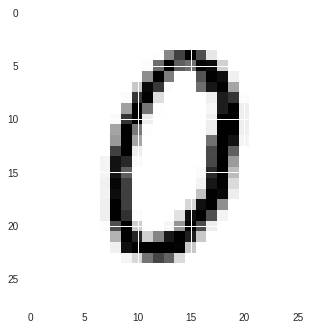

example 5, the corresponding label is 0


In [6]:
# 显示训练图片
example_index = 5 # change this number to display different sample

plt.imshow(df.iloc[example_index, 1:].reshape((28,28)), cmap = 'Greys')
plt.show()
print("example {}, the corresponding label is {}".format(example_index, df.iloc[example_index, 0]))

In [0]:
# Split data into feature and label
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [8]:
# converting data into numpy arrays for keras
X_array = X.values
y_array = y.values

# check shape of the resulting array
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [9]:
# onehot encoding 因为keras需要onehot，encoding
y_onehot = keras.utils.to_categorical(y, 10)
y_onehot.shape

(42000, 10)

In [0]:
#分两次，把数据分成train/test/validation， 比例0.6/0.2/0。2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_onehot, y_test_onehot = train_test_split(X, 
                                                                  y_onehot,
                                                                  test_size = 0.2,
                                                                  random_state = 42
                                                                 ) 

X_train, X_validation, y_train_onehot, y_validation_onehot = train_test_split(X_train, 
                                                                  y_train_onehot,
                                                                  test_size = 0.25,
                                                                  random_state = 42
                                                                 ) 

In [11]:
# 验证dimension
print(X_train.shape, X_test.shape, X_validation.shape)
print(y_train_onehot.shape, y_test_onehot.shape, y_validation_onehot.shape)

(25200, 784) (8400, 784) (8400, 784)
(25200, 10) (8400, 10) (8400, 10)


In [0]:
# 开始训练模型
from keras import backend
from keras.layers import Dense, Activation
from keras.models import Sequential

backend.clear_session()


In [0]:
# 定义模型形状和activation function
model = Sequential()  # it is a feed-forward network without loops like in RNN
model.add(Dense(256, input_shape=(784,)))  # the first layer must specify the input shape (replacing placeholders)
model.add(Activation('sigmoid'))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

In [18]:
from keras_tqdm import TQDMCallback # 进度条

model.fit(
    X_train, 
    y_train_onehot,
    batch_size=512, 
    epochs=40,
    validation_data=(X_validation, y_validation_onehot),
    callbacks=[TQDMCallback()],
    verbose=0
)

Epoch: 0 - loss: 1.274, acc: 0.700:  98%|█████████▊| 24576/25200 [00:02<00:00, 12933.08it/s]
Epoch: 0 - loss: 1.258, acc: 0.703, val_loss: 0.574, val_acc: 0.873: 100%|██████████| 25200/25200 [00:02<00:00, 6469.16it/s]
Epoch: 1 - loss: 0.444, acc: 0.890:  93%|█████████▎| 23552/25200 [00:01<00:00, 14976.22it/s]
Epoch: 1 - loss: 0.439, acc: 0.891, val_loss: 0.361, val_acc: 0.903: 100%|██████████| 25200/25200 [00:01<00:00, 10691.97it/s]
Epoch: 2 - loss: 0.322, acc: 0.913:  95%|█████████▌| 24064/25200 [00:01<00:00, 14966.50it/s]
Epoch: 2 - loss: 0.321, acc: 0.913, val_loss: 0.297, val_acc: 0.920: 100%|██████████| 25200/25200 [00:01<00:00, 9408.95it/s]
Epoch: 3 - loss: 0.273, acc: 0.924: 100%|█████████▉| 25088/25200 [00:01<00:00, 15022.84it/s]
Epoch: 3 - loss: 0.273, acc: 0.924, val_loss: 0.266, val_acc: 0.926: 100%|██████████| 25200/25200 [00:01<00:00, 1988.67it/s]
Epoch: 4 - loss: 0.241, acc: 0.931:  98%|█████████▊| 24576/25200 [00:01<00:00, 14941.76it/s]
Epoch: 4 - loss: 0.241, acc: 0.931

In [22]:
test_score = model.evaluate(X_test, y_test_onehot)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

8400/8400 [==============================] - 0s 38us/step
Test loss: 0.16406537897530057
Test accuracy: 0.9479761904761905


In [49]:
# 验证过模型可行后，用所有数据重新训练一次模型，以最大化sample size
model.fit(
    X, 
    y_onehot,
    batch_size=512, 
    epochs=40,
    validation_data=(X_validation, y_validation_onehot),
    callbacks=[TQDMCallback()],
    verbose=0
)

Epoch: 0 - loss: 0.129, acc: 0.960:  99%|█████████▊| 41472/42000 [00:03<00:00, 13161.52it/s]
Epoch: 0 - loss: 0.129, acc: 0.960, val_loss: 0.162, val_acc: 0.948: 100%|██████████| 42000/42000 [00:03<00:00, 6134.02it/s]
Epoch: 1 - loss: 0.122, acc: 0.962:  99%|█████████▊| 41472/42000 [00:03<00:00, 13275.51it/s]
Epoch: 1 - loss: 0.123, acc: 0.962, val_loss: 0.148, val_acc: 0.955: 100%|██████████| 42000/42000 [00:03<00:00, 6257.91it/s]
Epoch: 2 - loss: 0.127, acc: 0.960:  99%|█████████▊| 41472/42000 [00:03<00:00, 13094.02it/s]
Epoch: 2 - loss: 0.126, acc: 0.960, val_loss: 0.153, val_acc: 0.955: 100%|██████████| 42000/42000 [00:03<00:00, 6280.77it/s]
Epoch: 3 - loss: 0.125, acc: 0.961:  99%|█████████▊| 41472/42000 [00:03<00:00, 13081.05it/s]
Epoch: 3 - loss: 0.125, acc: 0.961, val_loss: 0.154, val_acc: 0.954: 100%|██████████| 42000/42000 [00:03<00:00, 6087.40it/s]
Epoch: 4 - loss: 0.129, acc: 0.960:  99%|█████████▊| 41472/42000 [00:03<00:00, 13065.81it/s]
Epoch: 4 - loss: 0.129, acc: 0.960,

In [50]:
# 读入submission的feature
df_submission_data = pd.read_csv('raw/test.csv')
df_submission_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# 把测试数据转换为numpy array 并score
X_submission = df_submission_data.values
y_submission = model.predict_classes(X_submission)

In [0]:
# 将结果存为竞赛需要的格式
df_submission = pd.DataFrame({'ImageId': range(1, y_submission.shape[0] + 1), 'Label': y_submission})
df_submission.to_csv('submission.csv', index=False)

In [54]:
# 命令行提交
!kaggle competitions submit -c digit-recognizer -f submission.csv -m 'keras example submission'

100% 208k/208k [00:01<00:00, 201kB/s]
Successfully submitted to Digit Recognizer